In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../../../../datasets/globalterrorism.csv')
df.head(3)

/Users/neil/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df['Incident'] = 1

## df1 = Total Bombings by Year

In [4]:
df1 = pd.DataFrame(df[df.attacktype1_txt == 'Bombing/Explosion'].groupby('iyear').Incident.sum())
df1.reset_index(inplace=True)

In [5]:
df1.head(3)

,iyear,Incident
0,1970,333
1,1971,238
2,1972,186


In [6]:
df1.tail(3)

,iyear,Incident
42,2013,6669
43,2014,8759
44,2015,7615


## df2 = Total Bombings by Year, Grouped by Region

In [7]:
df[df.attacktype1_txt == 'Bombing/Explosion'].groupby(['iyear','region_txt']).Incident.sum()

iyear  region_txt                 
1970   Australasia & Oceania             1
       Eastern Europe                    8
       Middle East & North Africa       14
       North America                   278
       South America                    11
       Southeast Asia                    6
       Western Europe                   15
1971   Australasia & Oceania             1
       East Asia                         1
       Middle East & North Africa       36
       North America                   143
       South America                     3
       Southeast Asia                    3
       Western Europe                   51
1972   Australasia & Oceania             2
       Central America & Caribbean       3
       Eastern Europe                    1
       Middle East & North Africa       23
       North America                    40
       South America                     8
       Southeast Asia                    3
       Western Europe                  106
1973   Central Amer

In [8]:
df2 = pd.DataFrame(df[df.attacktype1_txt == 'Bombing/Explosion'].groupby(['iyear','region_txt']).Incident.sum())
df2.tail(11)

Incident
iyear region_txt                          
2015  Australasia & Oceania              1
      Central Asia                       1
      East Asia                          7
      Eastern Europe                   457
      Middle East & North Africa      3872
      North America                     19
      South America                     86
      South Asia                      2106
      Southeast Asia                   436
      Sub-Saharan Africa               522
      Western Europe                   108

In [9]:
df2.reset_index(inplace=True)

In [10]:
df2.head(10)

,iyear,region_txt,Incident
0,1970,Australasia & Oceania,1
1,1970,Eastern Europe,8
2,1970,Middle East & North Africa,14
3,1970,North America,278
4,1970,South America,11
5,1970,Southeast Asia,6
6,1970,Western Europe,15
7,1971,Australasia & Oceania,1
8,1971,East Asia,1
9,1971,Middle East & North Africa,36


## df3 = Total Incidents by Region

In [11]:
df3 = pd.DataFrame(df2.groupby('region_txt').Incident.sum())
df3.reset_index(inplace=True)
df3.head(len(df3))

,region_txt,Incident
0,Australasia & Oceania,72
1,Central America & Caribbean,3239
2,Central Asia,224
3,East Asia,325
4,Eastern Europe,2665
5,Middle East & North Africa,24053
6,North America,1518
7,South America,8931
8,South Asia,18247
9,Southeast Asia,4019


sort by nearby years to see if there's some sort of pattern


## df4 = Incidents Per Year by Region

In [12]:
df4 = df3.copy()

In [13]:
df4['Incident Per Year'] = df4.Incident / 45

In [14]:
df4.head(len(df4))

,region_txt,Incident,Incident Per Year
0,Australasia & Oceania,72,1.600000
1,Central America & Caribbean,3239,71.977778
2,Central Asia,224,4.977778
3,East Asia,325,7.222222
4,Eastern Europe,2665,59.222222
5,Middle East & North Africa,24053,534.511111
6,North America,1518,33.733333
7,South America,8931,198.466667
8,South Asia,18247,405.488889
9,Southeast Asia,4019,89.311111


## Country Incident Took Place

In [15]:
df[df.iyear==1991].country_txt.value_counts().head(15)

Peru                        658
El Salvador                 500
Colombia                    420
India                       339
Turkey                      293
United Kingdom              262
Philippines                 162
Pakistan                    150
France                      137
South Africa                127
Chile                       127
Sri Lanka                   115
Lebanon                      91
Spain                        89
West Bank and Gaza Strip     83
Name: country_txt, dtype: int64

In [16]:
df[df.iyear==1992].country_txt.value_counts().head(15)

Colombia                    523
Turkey                      514
Peru                        383
United Kingdom              274
South Africa                271
India                       237
Algeria                     215
Philippines                 162
Germany                     156
France                      126
West Bank and Gaza Strip    119
Chile                       116
Sri Lanka                   103
Lebanon                      91
Pakistan                     85
Name: country_txt, dtype: int64

In [17]:
df[df.iyear==1994].country_txt.value_counts().head(15)

Turkey                      300
United Kingdom              256
Algeria                     227
Colombia                    201
South Africa                174
West Bank and Gaza Strip    165
Pakistan                    154
Egypt                       143
India                       107
France                       97
Peru                         91
Guatemala                    84
Germany                      79
Philippines                  72
Bangladesh                   68
Name: country_txt, dtype: int64

## Region of Attack

In [18]:
df[df.iyear==1990].region_txt.value_counts().head(10)

South America                  1076
South Asia                      601
Middle East & North Africa      494
Sub-Saharan Africa              450
Western Europe                  390
Southeast Asia                  348
Central America & Caribbean     316
East Asia                        99
Eastern Europe                   58
North America                    37
Name: region_txt, dtype: int64

In [19]:
df[df.iyear==1991].region_txt.value_counts().head(10)

South America                  1322
Central America & Caribbean     729
Western Europe                  696
South Asia                      677
Middle East & North Africa      612
Sub-Saharan Africa              271
Southeast Asia                  206
Eastern Europe                   84
North America                    40
East Asia                        29
Name: region_txt, dtype: int64

In [20]:
df[df.iyear==1992].region_txt.value_counts().head(10)

South America                  1204
Middle East & North Africa     1193
Western Europe                  769
Sub-Saharan Africa              571
South Asia                      545
Southeast Asia                  279
Central America & Caribbean     212
Eastern Europe                   91
Central Asia                     77
East Asia                        74
Name: region_txt, dtype: int64

#### Pablo Escobar was killed in December of 93 so likely attacks were still high in 93 and didnt drop off til 94?

In [21]:
df[df.iyear==1994].region_txt.value_counts().head(10)

Middle East & North Africa     1051
Western Europe                  584
Sub-Saharan Africa              433
South Asia                      376
South America                   373
Central America & Caribbean     180
Southeast Asia                  151
North America                   102
Eastern Europe                   95
Central Asia                     65
Name: region_txt, dtype: int64

In [22]:
df[df.iyear==1995].region_txt.value_counts().head(10)

South Asia                     1051
Middle East & North Africa      590
Western Europe                  337
South America                   255
Sub-Saharan Africa              239
Southeast Asia                  168
Central America & Caribbean     168
North America                    94
Eastern Europe                   68
Central Asia                     55
Name: region_txt, dtype: int64

## Terrorist Group

In [23]:
df[df.iyear==1990].gname.value_counts().head()

Unknown                                                        1230
Shining Path (SL)                                               371
National Union for the Total Independence of Angola (UNITA)     197
New People's Army (NPA)                                         183
Farabundo Marti National Liberation Front (FMLN)                181
Name: gname, dtype: int64

## US Citizens Killed

In [24]:
df[df.iyear==1992].nkillus.value_counts().head()

0.0    137
1.0     16
5.0      1
3.0      1
2.0      1
Name: nkillus, dtype: int64

In [25]:
df[df.iyear==1994].nkillus.value_counts().head()

0.0    128
1.0     14
3.0      1
2.0      1
Name: nkillus, dtype: int64

## Target Type

In [26]:
df[df.iyear == 1990].targtype1_txt.value_counts()

Private Citizens & Property       757
Police                            533
Business                          525
Government (General)              514
Military                          452
Utilities                         378
Transportation                    250
Religious Figures/Institutions    106
Educational Institution            78
Government (Diplomatic)            58
Violent Political Party            58
Journalists & Media                54
Terrorists/Non-State Militia       31
Airports & Aircraft                22
Telecommunication                  22
Food or Water Supply               14
Tourists                            9
NGO                                 8
Abortion Related                    8
Other                               4
Maritime                            3
Unknown                             3
Name: targtype1_txt, dtype: int64

## Attack Type

In [27]:
df[df.iyear == 1991].attacktype1_txt.value_counts()

Bombing/Explosion                      1988
Armed Assault                          1271
Assassination                           730
Facility/Infrastructure Attack          353
Hostage Taking (Kidnapping)             222
Unknown                                  64
Hijacking                                25
Hostage Taking (Barricade Incident)      16
Unarmed Assault                          14
Name: attacktype1_txt, dtype: int64

In [28]:
df[df.iyear == 1992].attacktype1_txt.value_counts()

Bombing/Explosion                      1738
Armed Assault                          1327
Assassination                          1111
Facility/Infrastructure Attack          473
Unknown                                 188
Hostage Taking (Kidnapping)             142
Unarmed Assault                          48
Hijacking                                24
Hostage Taking (Barricade Incident)      22
Name: attacktype1_txt, dtype: int64

In [29]:
df[df.iyear == 1994].attacktype1_txt.value_counts()

Bombing/Explosion                      1153
Armed Assault                           818
Assassination                           771
Unknown                                 204
Hostage Taking (Kidnapping)             191
Facility/Infrastructure Attack          189
Unarmed Assault                          61
Hijacking                                37
Hostage Taking (Barricade Incident)      34
Name: attacktype1_txt, dtype: int64

In [30]:
df[df.iyear == 1995].attacktype1_txt.value_counts()

Bombing/Explosion                      791
Armed Assault                          740
Assassination                          729
Facility/Infrastructure Attack         297
Unknown                                232
Hostage Taking (Kidnapping)            141
Unarmed Assault                        108
Hijacking                               30
Hostage Taking (Barricade Incident)     13
Name: attacktype1_txt, dtype: int64

## Bombings and Explosions Only - by Region

In [31]:
df[(df.iyear == 1991) & (df.attacktype1_txt == 'Bombing/Explosion')].groupby('region_txt').attacktype1_txt.value_counts()

region_txt                   attacktype1_txt  
Australasia & Oceania        Bombing/Explosion      3
Central America & Caribbean  Bombing/Explosion    295
Central Asia                 Bombing/Explosion      2
East Asia                    Bombing/Explosion      6
Eastern Europe               Bombing/Explosion     38
Middle East & North Africa   Bombing/Explosion    268
North America                Bombing/Explosion     13
South America                Bombing/Explosion    687
South Asia                   Bombing/Explosion    208
Southeast Asia               Bombing/Explosion     81
Sub-Saharan Africa           Bombing/Explosion     46
Western Europe               Bombing/Explosion    341
Name: attacktype1_txt, dtype: int64

In [32]:
df[(df.iyear == 1992) & (df.attacktype1_txt == 'Bombing/Explosion')].groupby('region_txt').attacktype1_txt.value_counts()

region_txt                   attacktype1_txt  
Central America & Caribbean  Bombing/Explosion     74
Central Asia                 Bombing/Explosion     24
East Asia                    Bombing/Explosion     22
Eastern Europe               Bombing/Explosion     40
Middle East & North Africa   Bombing/Explosion    253
North America                Bombing/Explosion      5
South America                Bombing/Explosion    689
South Asia                   Bombing/Explosion    131
Southeast Asia               Bombing/Explosion     97
Sub-Saharan Africa           Bombing/Explosion     96
Western Europe               Bombing/Explosion    307
Name: attacktype1_txt, dtype: int64

In [33]:
df[(df.iyear == 1994) & (df.attacktype1_txt == 'Bombing/Explosion')].groupby('region_txt').attacktype1_txt.value_counts()

region_txt                   attacktype1_txt  
Australasia & Oceania        Bombing/Explosion      4
Central America & Caribbean  Bombing/Explosion     71
Central Asia                 Bombing/Explosion     26
East Asia                    Bombing/Explosion      6
Eastern Europe               Bombing/Explosion     48
Middle East & North Africa   Bombing/Explosion    292
North America                Bombing/Explosion     19
South America                Bombing/Explosion    180
South Asia                   Bombing/Explosion    135
Southeast Asia               Bombing/Explosion     49
Sub-Saharan Africa           Bombing/Explosion     79
Western Europe               Bombing/Explosion    244
Name: attacktype1_txt, dtype: int64

In [34]:
df[(df.iyear == 1995) & (df.attacktype1_txt == 'Bombing/Explosion')].groupby('region_txt').attacktype1_txt.value_counts()

region_txt                   attacktype1_txt  
Australasia & Oceania        Bombing/Explosion      1
Central America & Caribbean  Bombing/Explosion     30
Central Asia                 Bombing/Explosion     13
East Asia                    Bombing/Explosion     11
Eastern Europe               Bombing/Explosion     32
Middle East & North Africa   Bombing/Explosion    176
North America                Bombing/Explosion     17
South America                Bombing/Explosion     82
South Asia                   Bombing/Explosion    175
Southeast Asia               Bombing/Explosion     75
Sub-Saharan Africa           Bombing/Explosion     55
Western Europe               Bombing/Explosion    124
Name: attacktype1_txt, dtype: int64

## Total Count of Bombings and Explosions by Year

In [35]:
print(len(df[(df.iyear == 1991) & (df.attacktype1_txt == 'Bombing/Explosion')].attacktype1))
print(len(df[(df.iyear == 1992) & (df.attacktype1_txt == 'Bombing/Explosion')].attacktype1))
print(len(df[(df.iyear == 1994) & (df.attacktype1_txt == 'Bombing/Explosion')].attacktype1))
print(len(df[(df.iyear == 1995) & (df.attacktype1_txt == 'Bombing/Explosion')].attacktype1))

1988
1738
1153
791


## Bombings by Region from 91-95

In [36]:
bombings = pd.DataFrame()

In [37]:
temp1 = df[(df.iyear == 1991) & (df.attacktype1_txt == 'Bombing/Explosion')].groupby('region_txt').count()
temp2 = df[(df.iyear == 1992) & (df.attacktype1_txt == 'Bombing/Explosion')].groupby('region_txt').count()
temp4 = df[(df.iyear == 1994) & (df.attacktype1_txt == 'Bombing/Explosion')].groupby('region_txt').count()
temp5 = df[(df.iyear == 1995) & (df.attacktype1_txt == 'Bombing/Explosion')].groupby('region_txt').count()

In [38]:
bombings['Bombings 1991'] = temp1['Incident']
bombings['Bombings 1992'] = temp2['Incident']
bombings['Bombings 1994'] = temp4['Incident']
bombings['Bombings 1995'] = temp5['Incident']

In [39]:
bombings.fillna(value=0,inplace=True)

In [40]:
bombings.head(len(bombings))

,Bombings 1991,Bombings 1992,Bombings 1994,Bombings 1995
region_txt,,,,
Australasia & Oceania,3,0.0,4,1
Central America & Caribbean,295,74.0,71,30
Central Asia,2,24.0,26,13
East Asia,6,22.0,6,11
Eastern Europe,38,40.0,48,32
Middle East & North Africa,268,253.0,292,176
North America,13,5.0,19,17
South America,687,689.0,180,82
South Asia,208,131.0,135,175


In [41]:
bombings = bombings.T

In [42]:
bombings.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Bombings 1991,3.0,295.0,2.0,6.0,38.0,268.0,13.0,687.0,208.0,81.0,46.0,341.0
Bombings 1992,0.0,74.0,24.0,22.0,40.0,253.0,5.0,689.0,131.0,97.0,96.0,307.0
Bombings 1994,4.0,71.0,26.0,6.0,48.0,292.0,19.0,180.0,135.0,49.0,79.0,244.0
Bombings 1995,1.0,30.0,13.0,11.0,32.0,176.0,17.0,82.0,175.0,75.0,55.0,124.0


In [43]:
bombings['All'] = bombings.sum(axis=1)

In [44]:
bombings.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe,All
Bombings 1991,3.0,295.0,2.0,6.0,38.0,268.0,13.0,687.0,208.0,81.0,46.0,341.0,1988.0
Bombings 1992,0.0,74.0,24.0,22.0,40.0,253.0,5.0,689.0,131.0,97.0,96.0,307.0,1738.0
Bombings 1994,4.0,71.0,26.0,6.0,48.0,292.0,19.0,180.0,135.0,49.0,79.0,244.0,1153.0
Bombings 1995,1.0,30.0,13.0,11.0,32.0,176.0,17.0,82.0,175.0,75.0,55.0,124.0,791.0


In [45]:
##bombings.to_csv('bombings.csv')

## Average Bombings from 91-95 by Region

In [46]:
import numpy as np
avg = np.mean(bombings)
avg

region_txt
Australasia & Oceania             2.00
Central America & Caribbean     117.50
Central Asia                     16.25
East Asia                        11.25
Eastern Europe                   39.50
Middle East & North Africa      247.25
North America                    13.50
South America                   409.50
South Asia                      162.25
Southeast Asia                   75.50
Sub-Saharan Africa               69.00
Western Europe                  254.00
All                            1417.50
dtype: float64

## South America Bombings 1970-2015

In [47]:
region_df = pd.DataFrame(df[df.attacktype1_txt == 'Bombing/Explosion'].groupby(['region_txt','iyear']).Incident.sum())

In [48]:
region_df.head()

Incident
region_txt            iyear          
Australasia & Oceania 1970          1
                      1971          1
                      1972          2
                      1978          2
                      1979          2

In [49]:
region_df2 = region_df.copy().reset_index()

In [50]:
region_df2.head()

,region_txt,iyear,Incident
0,Australasia & Oceania,1970,1
1,Australasia & Oceania,1971,1
2,Australasia & Oceania,1972,2
3,Australasia & Oceania,1978,2
4,Australasia & Oceania,1979,2


In [51]:
sa_df = region_df2[region_df2.region_txt =='South America']
sa_df.head()

,region_txt,iyear,Incident
251,South America,1970,11
252,South America,1971,3
253,South America,1972,8
254,South America,1973,22
255,South America,1974,44


## South America Bombings 83-03

In [52]:
sa_df_83_03 = sa_df[(sa_df.iyear >= 1983) & (sa_df.iyear <= 2003)]

## South America Bombings 83-92

In [96]:
sa_df_83_92 = sa_df[(sa_df.iyear >= 1983) & (sa_df.iyear <= 1992)]

In [97]:
mean_83_92 = sa_df[(sa_df.iyear >= 1983) & (sa_df.iyear <= 1992)].Incident.mean()

## South America Bombings 94-03

In [95]:
sa_df_94_03 = sa_df[(sa_df.iyear >= 1994) & (sa_df.iyear <= 2003)]

In [98]:
mean_94_03 = sa_df[(sa_df.iyear >= 1994) & (sa_df.iyear <= 2003)].Incident.mean()

## South American Min and Max Bombings (1970-2015)

In [57]:
sa_df.Incident.min()

3

In [58]:
sa_df.Incident.max()

859

## PYMC

In [59]:
import pymc3 as pm

Couldn't import dot_parser, loading of dot files will not be possible.


In [60]:
SA_pre = sa_df_83_92.Incident.values
SA_post = sa_df_94_03.Incident.values

In [61]:
sa_df.Incident.mean()

198.46666666666667

In [62]:
prior_mean = sa_df.Incident.mean()
prior_std = sa_df.Incident.std()

print prior_mean
print prior_std

198.466666667
238.809319142


In [63]:
with pm.Model() as model:
    pre_death_mean = pm.Normal('Pre_Death_Mean', prior_mean, sd=prior_std)
    post_death_mean = pm.Normal('Post_Death_Mean', prior_mean, sd=prior_std)

In [64]:
std_prior_lower = 0.01
std_prior_upper = 300.0

with model:
    
    pre_death_std = pm.Uniform('Pre_Death_STD', lower=std_prior_lower, upper=std_prior_upper)
    post_death_std = pm.Uniform('Post_Death_STD', lower=std_prior_lower, upper=std_prior_upper)

In [65]:
with model:

    group_pre = pm.Normal('pre', mu=pre_death_mean, sd=pre_death_std, observed=SA_pre)
    group_post = pm.Normal('post', mu=post_death_mean, sd=post_death_std, observed=SA_post)

In [66]:
with model:

    diff_of_means = pm.Deterministic('difference of means', pre_death_mean - post_death_mean)
    diff_of_stds = pm.Deterministic('difference of stds', pre_death_std - post_death_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((pre_death_std**2 + post_death_std**2) / 2))


In [67]:
with model:
    trace = pm.sample(25000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -142.45: 100%|██████████| 200000/200000 [00:18<00:00, 10953.69it/s]
Finished [100%]: Average ELBO = -142.14
100%|██████████| 25000/25000 [01:02<00:00, 396.97it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117bc7850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12caf3310>], dtype=object)

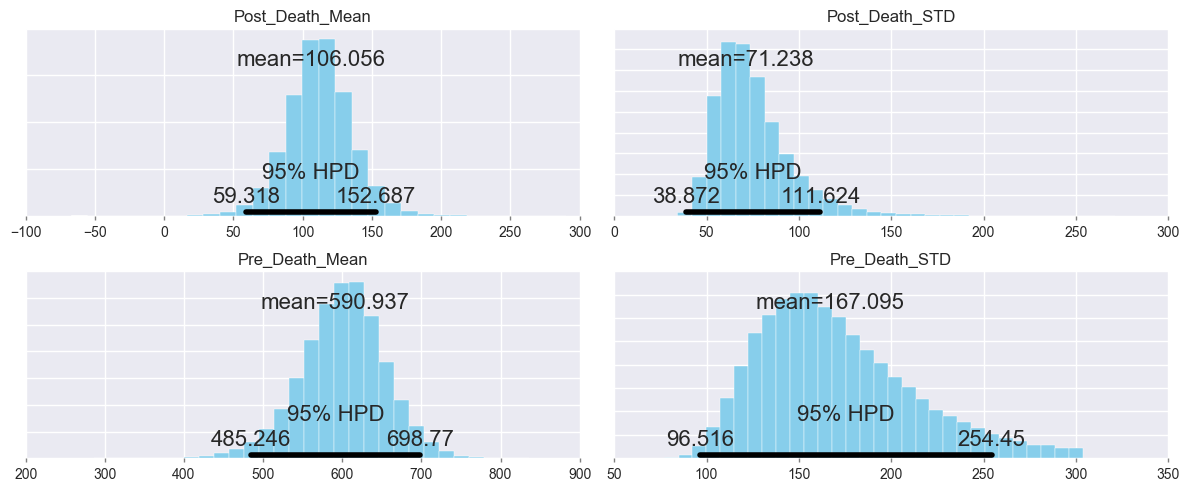

In [69]:
pm.plot_posterior(trace[3000:],
                  varnames=['Pre_Death_Mean', 'Post_Death_Mean', 'Pre_Death_STD', 'Post_Death_STD'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128aadb90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12be86950>], dtype=object)

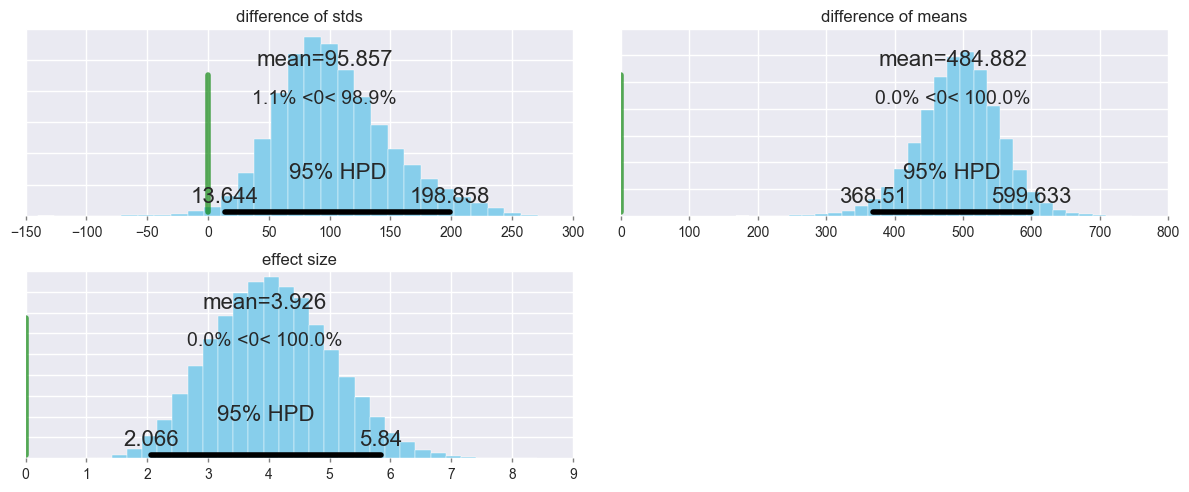

In [70]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [71]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  484.882          58.306           0.241            [368.510, 599.633]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  363.865        448.541        486.654        523.176        595.622


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  95.857           46.625           0.237            [13.644, 198.858]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  15.246         64.010         91.037         123.393        200.818


effect size:

  Mean             SD               MC Error         

## Total Bombings by Year

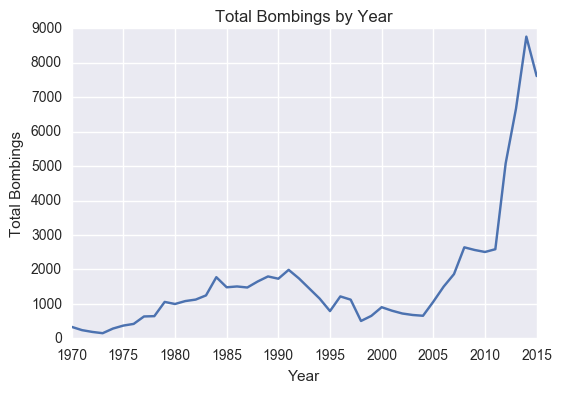

In [72]:
plt.plot(df1.iyear,df1.Incident)
plt.xlabel('Year')
plt.ylabel('Total Bombings')
plt.title('Total Bombings by Year')

## Bombings by Region

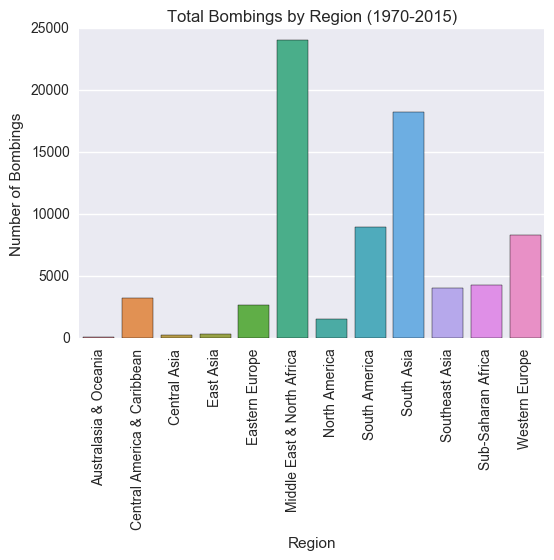

In [73]:
sns.barplot(x='region_txt', y='Incident', data=df3)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Bombings')
plt.xlabel('Region')
plt.title('Total Bombings by Region (1970-2015)')

## Bombings in South America

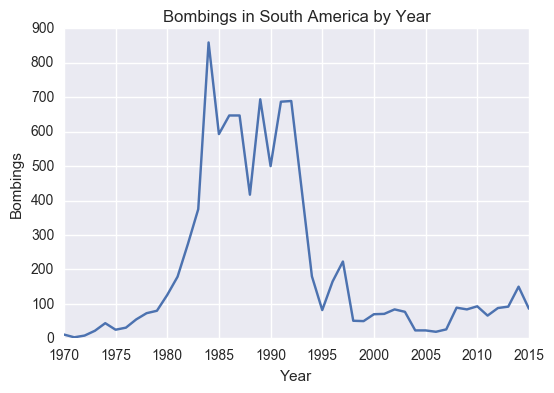

In [75]:
plt.plot(sa_df.iyear, sa_df.Incident)
plt.xlabel('Year')
plt.ylabel('Bombings')
plt.title('Bombings in South America by Year')

In [76]:
df2.head()

,iyear,region_txt,Incident
0,1970,Australasia & Oceania,1
1,1970,Eastern Europe,8
2,1970,Middle East & North Africa,14
3,1970,North America,278
4,1970,South America,11


In [77]:
df4.head(len(df4))

,region_txt,Incident,Incident Per Year
0,Australasia & Oceania,72,1.600000
1,Central America & Caribbean,3239,71.977778
2,Central Asia,224,4.977778
3,East Asia,325,7.222222
4,Eastern Europe,2665,59.222222
5,Middle East & North Africa,24053,534.511111
6,North America,1518,33.733333
7,South America,8931,198.466667
8,South Asia,18247,405.488889
9,Southeast Asia,4019,89.311111


In [78]:
df_9096 = df2[(df2.iyear >= 1990) & (df2.iyear <= 1996)]
df_9096.head()

,iyear,region_txt,Incident
191,1990,Australasia & Oceania,1
192,1990,Central America & Caribbean,172
193,1990,East Asia,27
194,1990,Eastern Europe,27
195,1990,Middle East & North Africa,137


## Predicted Bombings in 1993 by Region

In [79]:
aus = df_9096[df_9096.region_txt == 'Australasia & Oceania'].Incident.sum() / 6
print('Mean of Australasia & Oceania: ' + str(aus))

Mean of Australasia & Oceania: 3


In [80]:
cAmer = df_9096[df_9096.region_txt == 'Central America & Caribbean'].Incident.sum() / 6
print('Mean of Central America & Caribbean: ' + str(cAmer))

Mean of Central America & Caribbean: 111


In [81]:
cAsia = df_9096[df_9096.region_txt == 'Central Asia'].Incident.sum() / 6
print('Mean of Central Asia: ' + str(cAsia))

Mean of Central Asia: 13


In [82]:
eAsia = df_9096[df_9096.region_txt == 'East Asia'].Incident.sum() / 6
print('Mean of East Asia: ' + str(eAsia))

Mean of East Asia: 22


In [83]:
eEurope = df_9096[df_9096.region_txt == 'Eastern Europe'].Incident.sum() / 6
print('Mean of Eastern Europe: ' + str(eEurope))

Mean of Eastern Europe: 49


In [84]:
middle_east = df_9096[df_9096.region_txt == 'Middle East & North Africa'].Incident.sum() / 6
print('Mean of Middle East & North Africa: ' + str(middle_east))

Mean of Middle East & North Africa: 213


In [85]:
nAmer = df_9096[df_9096.region_txt == 'North America'].Incident.sum() / 6
print('Mean of North America: ' + str(nAmer))

Mean of North America: 14


In [86]:
sAmer = df_9096[df_9096.region_txt == 'South America'].Incident.sum() / 6
print('Mean of South America: ' + str(sAmer))

Mean of South America: 383


In [87]:
sAsia = df_9096[df_9096.region_txt == 'South Asia'].Incident.sum() / 6
print('Mean of South Asia: ' + str(sAsia))

Mean of South Asia: 179


In [88]:
seAsia = df_9096[df_9096.region_txt == 'Southeast Asia'].Incident.sum() / 6
print('Mean of Southeast Asia: ' + str(seAsia))

Mean of Southeast Asia: 81


In [89]:
ssAfr = df_9096[df_9096.region_txt == 'Sub-Saharan Africa'].Incident.sum() / 6
print('Mean of Sub-Saharan Africa: ' + str(ssAfr))

Mean of Sub-Saharan Africa: 98


In [90]:
wEurope = df_9096[df_9096.region_txt == 'Western Europe'].Incident.sum() / 6
print('Mean of Western Europe: ' + str(wEurope))

Mean of Western Europe: 265


## Total Predicted Bombings in 1993

In [91]:
df_pred = aus + cAmer + cAsia + eAsia + eEurope + middle_east + nAmer + sAmer + sAsia + seAsia + ssAfr + wEurope
df_pred

1431

## Appendix Info

In [92]:
## Percentage of attacks (from 1990-1996) that were bombings 

len_9096_bomb = len(df[(df.iyear>=1990) & (df.iyear<=1996) & (df.attacktype1_txt == 'Bombing/Explosion')]) 
len_9096 = float(len(df[(df.iyear>=1990) & (df.iyear<=1996)]))
pct_bombings = len_9096_bomb / len_9096
print(pct_bombings)

0.370858077287


In [93]:
appendix_pred = round(pct_bombings * 4954)
print('Prediction based off the appendix: ' + str(appendix_pred))

Prediction based off the appendix: 1837.0


## Aggregate Prediction

In [94]:
agg_pred = round((df_pred + appendix_pred) / 2)
print('Aggregate Prediction of 1993 Bombings: ' + str(agg_pred))

Aggregate Prediction of 1993 Bombings: 1634.0
